In [136]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 로테이션

In [137]:
player_1819 = pd.read_csv('data/player/PL_player_1819.csv')
player_2324 = pd.read_csv('data/player/PL_player_2324.csv')
player_2425 = pd.read_csv('data/player/PL_player_2425.csv')

In [138]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Mins', ascending=False)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
128,Alisson Becker,26,Liverpool,32,GK,38,3420,0,0.0,28.3,...,0.0,0.0,0.1,0.0,0.0,0.0,0.8,0.0,0.0,0
4,Virgil van Dijk,26,Liverpool,33,D(C),38,3385,2,0.2,79.9,...,0.0,0.2,1.0,1.1,0.3,1.1,5.2,0.0,0.5,0
2,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",37(1),3262,8,1.8,28.4,...,3.1,2.9,0.6,0.1,0.7,0.0,0.1,0.3,0.0,0
32,Andy Robertson,26,Liverpool,31,"D(L),M(L)",36,3219,11,1.4,66.6,...,0.6,0.9,2.2,0.8,0.5,0.5,1.3,0.9,0.2,0
5,Sadio Mané,26,Liverpool,32,"AM(CLR),FW",35(1),3086,1,1.3,32.9,...,1.3,2.9,1.0,0.4,0.9,0.1,0.2,0.8,0.1,0
95,Georginio Wijnaldum,26,Liverpool,34,M(CLR),32(3),2736,0,0.7,50.5,...,1.1,1.5,1.2,0.6,0.5,0.0,0.7,0.4,0.2,0
21,Roberto Firmino,26,Liverpool,33,"M(CLR),FW",31(3),2620,6,1.3,37.6,...,1.8,2.3,0.9,0.2,1.1,0.0,0.4,0.8,0.0,0
7,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",27(2),2467,12,1.7,58.5,...,0.5,1.4,2.1,1.2,0.5,0.3,2.1,1.1,0.1,0
76,Fabinho,26,Liverpool,31,"D(CR),DMC",21(7),2013,2,0.6,57.5,...,0.6,0.4,2.1,1.0,1.0,0.2,0.9,1.3,0.2,0
177,Jordan Henderson,26,Liverpool,34,"D(C),M(CLR)",21(11),1983,3,0.5,54.4,...,0.3,0.7,1.4,0.9,0.8,0.0,0.4,0.7,0.1,0


In [139]:
def plot_player_mins_hist_by_team(player_df, team_name, fixed_value):
    player_df = player_df[player_df['team_name'] == team_name]
    plt.figure(figsize=(10, 5))
    if fixed_value == 1:
        color = 'blue'
        title = f'Minutes Played Distribution for {team_name} Players'
    else:
        color = 'orange'
        title = f'Fixed Minutes Played Distribution for {team_name} Players'
        
    sns.histplot(player_df['Mins']*fixed_value, bins=20, color=color, alpha=0.5)
    plt.title(title)
    plt.xlabel('Minutes Played')
    plt.xlim(0, 4000)
    plt.yticks(np.arange(0, 3, 1))
    plt.ylabel('Number of Players')
    plt.grid()
    plt.show()

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


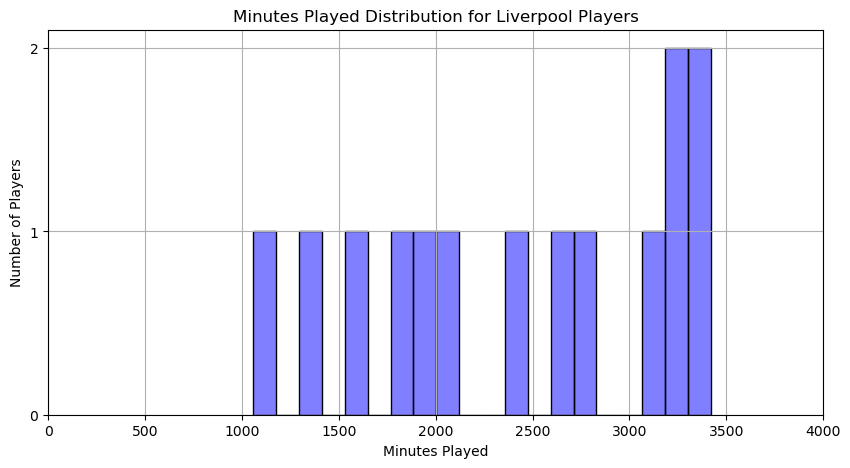

In [140]:
plot_player_mins_hist_by_team(player_1819, 'Liverpool', 1)

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


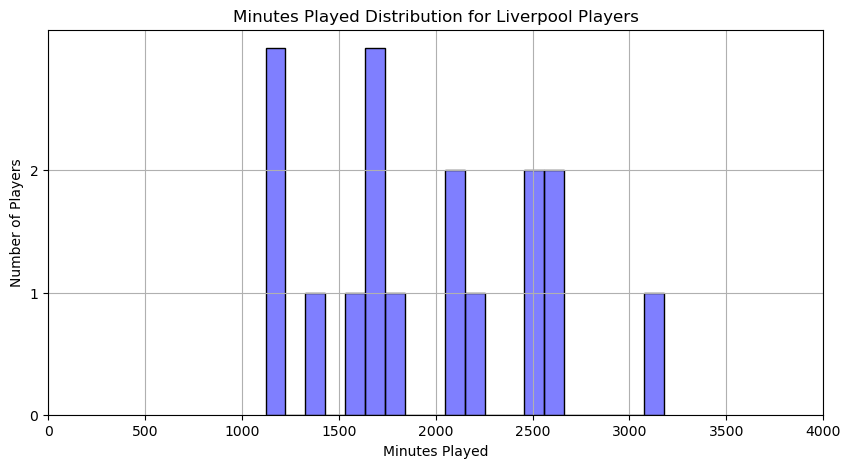

In [141]:
plot_player_mins_hist_by_team(player_2324, 'Liverpool', 1)

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


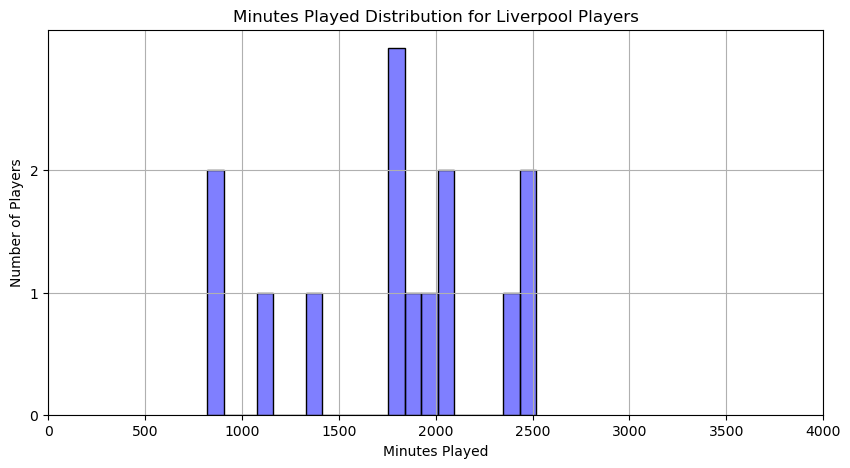

In [142]:
plot_player_mins_hist_by_team(player_2425, 'Liverpool', 1)

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


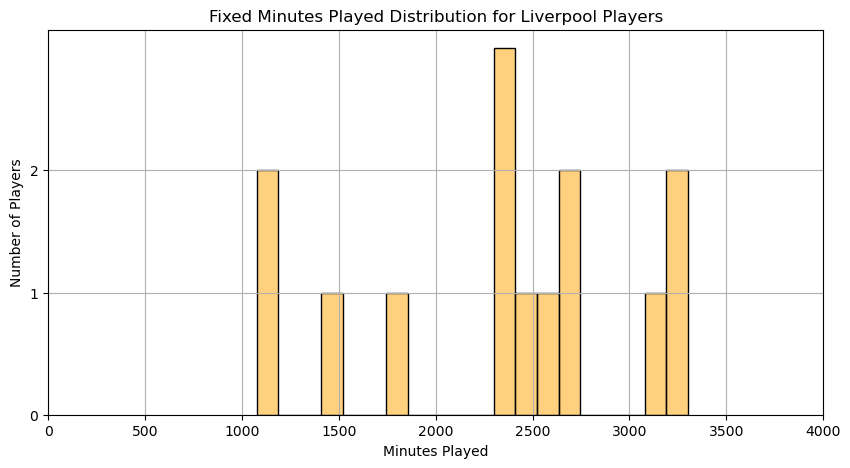

In [143]:
plot_player_mins_hist_by_team(player_2425, 'Liverpool', 38/29)

In [144]:
len(player_2425[player_2425['team_name'] == 'Liverpool'])

14

In [145]:
len(player_2324[player_2324['team_name'] == 'Liverpool'])

17

In [146]:
len(player_1819[player_1819['team_name'] == 'Liverpool'])

14

In [147]:
player_1819[player_1819['team_name'] == 'Liverpool']

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
2,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",37(1),3262,8,1.8,28.4,...,3.1,2.9,0.6,0.1,0.7,0.0,0.1,0.3,0.0,0
4,Virgil van Dijk,26,Liverpool,33,D(C),38,3385,2,0.2,79.9,...,0.0,0.2,1.0,1.1,0.3,1.1,5.2,0.0,0.5,0
5,Sadio Mané,26,Liverpool,32,"AM(CLR),FW",35(1),3086,1,1.3,32.9,...,1.3,2.9,1.0,0.4,0.9,0.1,0.2,0.8,0.1,0
7,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",27(2),2467,12,1.7,58.5,...,0.5,1.4,2.1,1.2,0.5,0.3,2.1,1.1,0.1,0
21,Roberto Firmino,26,Liverpool,33,"M(CLR),FW",31(3),2620,6,1.3,37.6,...,1.8,2.3,0.9,0.2,1.1,0.0,0.4,0.8,0.0,0
32,Andy Robertson,26,Liverpool,31,"D(L),M(L)",36,3219,11,1.4,66.6,...,0.6,0.9,2.2,0.8,0.5,0.5,1.3,0.9,0.2,0
36,Joël Matip,26,Liverpool,33,D(C),17(5),1535,0,0.1,61.0,...,0.0,0.3,1.8,1.5,0.5,0.8,3.5,0.5,0.3,0
76,Fabinho,26,Liverpool,31,"D(CR),DMC",21(7),2013,2,0.6,57.5,...,0.6,0.4,2.1,1.0,1.0,0.2,0.9,1.3,0.2,0
85,James Milner,26,Liverpool,39,"D(LR),M(CLR)",19(12),1787,4,1.4,45.2,...,0.3,1.0,1.4,0.6,0.9,0.2,0.7,0.8,0.2,0
95,Georginio Wijnaldum,26,Liverpool,34,M(CLR),32(3),2736,0,0.7,50.5,...,1.1,1.5,1.2,0.6,0.5,0.0,0.7,0.4,0.2,0


In [148]:
player_2324[player_2324['team_name']=='Liverpool']

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
15,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28(4),2536,10,2.1,29.2,...,1.8,2.4,0.5,0.1,0.4,0.0,0.0,0.5,0.0,0
20,Virgil van Dijk,26,Liverpool,33,D(C),36,3178,2,0.3,79.8,...,0.1,0.2,1.1,1.1,0.6,0.5,3.9,0.1,0.9,0
25,Andy Robertson,26,Liverpool,31,"D(L),M(L)",18(5),1693,2,2.7,54.1,...,0.3,0.8,1.5,0.6,0.4,0.2,1.5,0.7,0.3,0
26,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(3),2161,4,2.3,60.2,...,0.2,1.0,1.4,1.1,0.3,0.2,1.5,2.1,0.1,0
29,Diogo Jota,26,Liverpool,28,"AM(CLR),FW",14(7),1151,3,1.0,18.3,...,0.9,2.0,1.1,0.3,1.3,0.0,0.2,0.6,0.0,0
30,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",31(2),2612,5,1.4,58.4,...,1.1,0.9,3.0,1.1,1.6,0.0,0.8,2.0,0.2,0
31,Luis Díaz,26,Liverpool,28,"AM(LR),FW",32(5),2646,5,1.7,27.5,...,1.9,1.9,0.9,0.1,1.5,0.0,0.2,0.6,0.0,0
65,Darwin Núñez,26,Liverpool,25,"AM(CL),FW",22(14),2050,8,0.9,12.9,...,0.8,1.5,0.6,0.1,0.8,0.0,0.3,0.3,0.2,0
73,Cody Gakpo,26,Liverpool,25,"AM(CLR),FW",17(18),1646,5,0.7,15.3,...,0.9,1.3,0.8,0.4,0.8,0.0,0.2,0.5,0.1,0
86,Ibrahima Konaté,26,Liverpool,25,D(C),17(5),1571,0,0.4,65.9,...,0.2,0.4,1.6,0.9,1.1,0.8,2.3,0.3,0.5,0


In [149]:
player_2425[player_2425['team_name']=='Liverpool']

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,0,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28,2485,17,2.3,...,1.9,3.0,0.6,0.1,0.6,0.0,0.2,0.2,0.0,0
16,16,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(2),2069,6,1.8,...,0.6,0.7,2.4,1.0,0.3,0.3,1.6,1.9,0.3,0
18,18,Luis Díaz,26,Liverpool,28,"AM(LR),FW",21(6),1771,3,1.2,...,1.4,1.6,0.9,0.2,1.5,0.0,0.3,0.6,0.0,0
19,19,Virgil van Dijk,26,Liverpool,33,D(C),28,2520,1,0.3,...,0.1,0.2,1.1,1.5,0.4,0.8,5.0,0.3,0.4,0
31,31,Ryan Gravenberch,26,Liverpool,22,DMC,28,2397,2,0.8,...,0.5,1.4,1.8,1.8,1.3,0.0,1.6,0.6,0.3,0
32,32,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",25(2),2075,3,1.2,...,0.7,0.8,2.8,0.7,1.9,0.0,0.9,1.4,0.2,0
43,43,Dominik Szoboszlai,26,Liverpool,24,"AM(CLR),FW",21(5),1909,3,1.5,...,0.6,1.2,1.1,0.3,1.3,0.0,0.3,0.8,0.2,0
50,50,Ibrahima Konaté,26,Liverpool,25,D(C),21(1),1808,2,0.4,...,0.1,0.3,1.4,0.5,0.9,0.8,4.0,0.4,0.5,0
64,64,Cody Gakpo,26,Liverpool,25,"AM(CLR),FW",16(10),1412,3,1.2,...,0.6,1.2,0.9,0.3,0.5,0.1,0.5,0.3,0.1,0
105,105,Alisson Becker,26,Liverpool,32,GK,20,1789,0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.1,0.0,0


In [150]:
player_2324[player_2324['team_name'] == 'Liverpool'].sort_values(by='Mins', ascending=False).head(11)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
20,Virgil van Dijk,26,Liverpool,33,D(C),36,3178,2,0.3,79.8,...,0.1,0.2,1.1,1.1,0.6,0.5,3.9,0.1,0.9,0
31,Luis Díaz,26,Liverpool,28,"AM(LR),FW",32(5),2646,5,1.7,27.5,...,1.9,1.9,0.9,0.1,1.5,0.0,0.2,0.6,0.0,0
30,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",31(2),2612,5,1.4,58.4,...,1.1,0.9,3.0,1.1,1.6,0.0,0.8,2.0,0.2,0
15,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28(4),2536,10,2.1,29.2,...,1.8,2.4,0.5,0.1,0.4,0.0,0.0,0.5,0.0,0
170,Alisson Becker,26,Liverpool,32,GK,28,2520,0,0.0,35.6,...,0.0,0.1,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0
26,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(3),2161,4,2.3,60.2,...,0.2,1.0,1.4,1.1,0.3,0.2,1.5,2.1,0.1,0
98,Dominik Szoboszlai,26,Liverpool,24,"AM(CLR),FW",25(8),2110,2,1.7,42.4,...,0.8,0.8,1.0,0.5,0.9,0.0,0.4,1.0,0.1,0
65,Darwin Núñez,26,Liverpool,25,"AM(CL),FW",22(14),2050,8,0.9,12.9,...,0.8,1.5,0.6,0.1,0.8,0.0,0.3,0.3,0.2,0
194,Joe Gomez,26,Liverpool,27,D(CLR),17(15),1779,1,0.7,35.9,...,0.3,0.8,1.5,0.6,0.9,0.1,1.4,1.0,0.1,0
200,Wataru Endo,26,Liverpool,32,DMC,20(9),1723,0,0.6,45.0,...,0.8,0.9,1.7,0.7,1.7,0.0,1.0,1.4,0.1,0


In [151]:
pl1819 = pd.read_csv('data/match/PL1819_match.csv', index_col=0)
pl2324 = pd.read_csv('data/match/PL2324_match.csv', index_col=0)
pl2425 = pd.read_csv('data/match/PL2425_match.csv', index_col=0)

liv_1819 = pl1819[(pl1819['home'] == 'Liverpool') | (pl1819['away'] == 'Liverpool')]
liv_2324 = pl2324[(pl2324['home'] == 'Liverpool') | (pl2324['away'] == 'Liverpool')]
liv_2425 = pl2425[(pl2425['home'] == 'Liverpool') | (pl2425['away'] == 'Liverpool')]

In [152]:
liv_1819.columns

Index(['home_shot', 'away_shot', 'home_possession', 'away_possession',
       'home_pass_success', 'away_pass_success', 'home_dribbles',
       'away_dribbles', 'home_aerials_won', 'away_aerials_won', 'home_tackles',
       'away_tackles', 'home_corners', 'away_corners', 'home_dispossessed',
       'away_dispossessed', 'home_missing_player', 'away_missing_player',
       'home_missing_player_rating', 'away_missing_player_rating', 'home',
       'away', 'half_home_score', 'half_away_score', 'full_home_score',
       'full_away_score', 'kick_off', 'date', 'matchup_home_goals',
       'matchup_away_goals', 'matchup_home_wins', 'matchup_draw',
       'matchup_away_wins', 'home_total_att', 'away_total_att',
       'home_open_att', 'away_open_att', 'home_set_att', 'away_set_att',
       'home_counter_att', 'away_counter_att', 'home_pk_att', 'away_pk_att',
       'home_own_att', 'away_own_att', 'home_total_passes',
       'away_total_passes', 'home_crosses_passes', 'away_crosses_passes',
    

### 교체 선수 활용

#### 경기 별 평균 교체 시간(데이터 X)

#### 승점 쌓는 로그

In [153]:
liv_1819['date'] = pd.to_datetime(liv_1819['date'])
liv_2324['date'] = pd.to_datetime(liv_2324['date'])
liv_2425['date'] = pd.to_datetime(liv_2425['date'])

/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_85983/2213022.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  liv_1819['date'] = pd.to_datetime(liv_1819['date'])
/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_85983/2213022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_1819['date'] = pd.to_datetime(liv_1819['date'])
/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_85983/2213022.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

In [154]:
liv_1819_results = liv_1819[['date', 'home', 'away', 'half_home_score', 'half_away_score', 'full_home_score', 'full_away_score']].sort_values(by='date', ascending=True)
liv_2324_results = liv_2324[['date', 'home', 'away', 'half_home_score', 'half_away_score', 'full_home_score', 'full_away_score']].sort_values(by='date', ascending=True)
liv_2425_results = liv_2425[['date', 'home', 'away', 'half_home_score', 'half_away_score', 'full_home_score', 'full_away_score']].sort_values(by='date', ascending=True)

In [155]:
def liv_results_df(df):
    if df['home'] == 'Liverpool':
        df['full_liv_score'] = df['full_home_score']
        df['half_liv_score'] = df['half_home_score']
        if df['full_home_score'] > df['full_away_score']:
            df['winning_point'] = 3
        elif df['full_home_score'] == df['full_away_score']:
            df['winning_point'] = 1
        else:
            df['winning_point'] = 0
    else:
        df['full_liv_score'] = df['full_away_score']
        df['half_liv_score'] = df['half_away_score']
        if df['full_away_score'] > df['full_home_score']:
            df['winning_point'] = 3
        elif df['full_away_score'] == df['full_home_score']:
            df['winning_point'] = 1
        else:
            df['winning_point'] = 0
    
    return df    

In [156]:
liv_1819_results = liv_1819_results.apply(liv_results_df, axis=1)
liv_2324_results = liv_2324_results.apply(liv_results_df, axis=1)
liv_2425_results = liv_2425_results.apply(liv_results_df, axis=1)

In [157]:
liv_vs_mc_dict = {'date': pd.to_datetime('2024-03-11'), 'home': 'Liverpool', 'away': 'Manchester City', 
                  'half_home_score': 0, 'half_away_score': 1, 'full_home_score': 1, 'full_away_score': 1, 
                  'full_liv_score': 1, 'half_liv_score': 0, 'winning_point': 1}

In [158]:
liv_2324_results.loc[len(liv_2324_results)] = liv_vs_mc_dict

In [159]:
liv_2324_results.sort_values(by='date', ascending=True, inplace=True)

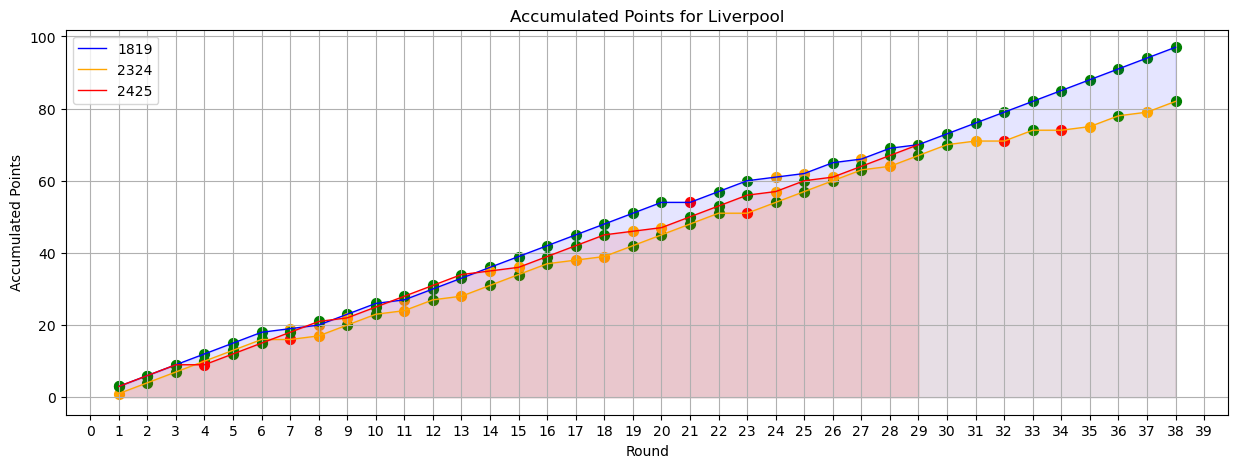

In [160]:
def plot_accumulated_points(df, color, label, fig=None, ax=None):  
    df['accumulated_points'] = df['winning_point'].cumsum()
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(15, 5))

    x_vals = np.arange(1, len(df) + 1)
    y_vals = df['accumulated_points']
    
    # 선 그래프
    ax.plot(x_vals, y_vals, color=color, linewidth=1, label=label)

    # 각 경기별 승/무/패 표시
    for i, point in enumerate(df['winning_point']):
        color_map = {3: 'green', 1: 'orange', 0: 'red'}
        ax.scatter(i + 1, y_vals.iloc[i], color=color_map.get(point, 'gray'), marker='o', s=50)

    # 영역 색칠
    ax.fill_between(x_vals, y_vals, color=color, alpha=0.1)
    
    # 축 설정
    ax.set_title('Accumulated Points for Liverpool')
    ax.set_xlabel('Round')
    ax.set_ylabel('Accumulated Points')
    ax.set_xticks(np.arange(0, 40, 1))
    ax.grid()
    ax.legend()

    return fig, ax

fig, ax = plot_accumulated_points(liv_1819_results, 'blue', '1819')
fig, ax = plot_accumulated_points(liv_2324_results, 'orange', '2324', fig=fig, ax=ax)
fig, ax = plot_accumulated_points(liv_2425_results, 'red', '2425', fig=fig, ax=ax)

In [161]:
print(liv_1819_results[liv_1819_results['home']=='Liverpool']['full_home_score'].sum()/19, 
      liv_1819_results[liv_1819_results['home']=='Liverpool']['full_away_score'].sum()/19,
      liv_1819_results[liv_1819_results['home']=='Liverpool']['winning_point'].sum()/19)

print(liv_1819_results[liv_1819_results['away']=='Liverpool']['full_away_score'].sum()/19,
      liv_1819_results[liv_1819_results['away']=='Liverpool']['full_home_score'].sum()/19,
      liv_1819_results[liv_1819_results['away']=='Liverpool']['winning_point'].sum()/19)

print(liv_2324_results[liv_2324_results['home']=='Liverpool']['full_home_score'].sum()/19, 
      liv_2324_results[liv_2324_results['home']=='Liverpool']['full_away_score'].sum()/19,
      liv_2324_results[liv_2324_results['home']=='Liverpool']['winning_point'].sum()/19)

print(liv_2324_results[liv_2324_results['away']=='Liverpool']['full_away_score'].sum()/19,
      liv_2324_results[liv_2324_results['away']=='Liverpool']['full_home_score'].sum()/19,
      liv_2324_results[liv_2324_results['away']=='Liverpool']['winning_point'].sum()/19)

print(liv_2425_results[liv_2425_results['home']=='Liverpool']['full_home_score'].sum()/14,
      liv_2425_results[liv_2425_results['home']=='Liverpool']['full_away_score'].sum()/14,
      liv_2425_results[liv_2425_results['home']=='Liverpool']['winning_point'].sum()/14)

print(liv_2425_results[liv_2425_results['away']=='Liverpool']['full_away_score'].sum()/15,
      liv_2425_results[liv_2425_results['away']=='Liverpool']['full_home_score'].sum()/15,
      liv_2425_results[liv_2425_results['away']=='Liverpool']['winning_point'].sum()/15)

2.8947368421052633 0.5263157894736842 2.789473684210526
1.7894736842105263 0.631578947368421 2.3157894736842106
2.5789473684210527 0.8947368421052632 2.526315789473684
1.9473684210526316 1.263157894736842 1.7894736842105263
2.2142857142857144 0.7857142857142857 2.5
2.533333333333333 1.0666666666666667 2.3333333333333335


In [162]:
len(liv_2425_results[liv_2425_results['away']=='Liverpool'])

15

#### 패스 타입

In [163]:
def pass_types(df, team_name):
    output_dict = {'total' : 0,
                  'crosses' : 0,
                  'long_balls' : 0,
                  'short_passes' : 0} 
    df = df[['home', 'away', 
                          'home_total_passes', 'away_total_passes', 
                          'home_crosses_passes', 'away_crosses_passes',
                          'home_long_balls', 'away_long_balls',
                          'home_short_passes', 'away_short_passes']]
    df = df[(df['home'] == team_name) | (df['away'] == team_name)]
    df = df.reset_index(drop=True)

    for i in range(len(df)):
        if df['home'][i] == team_name:
            output_dict['total'] += df['home_total_passes'][i]
            output_dict['crosses'] += df['home_crosses_passes'][i]
            output_dict['long_balls'] += df['home_long_balls'][i]
            output_dict['short_passes'] += df['home_short_passes'][i]
        else:
            output_dict['total'] += df['away_total_passes'][i]
            output_dict['crosses'] += df['away_crosses_passes'][i]
            output_dict['long_balls'] += df['away_long_balls'][i]
            output_dict['short_passes'] += df['away_short_passes'][i]
    return output_dict

def plot_pass_types(df, team_name):
    pass_types_dict = pass_types(df, team_name)
    total = pass_types_dict['total']
    cross = pass_types_dict['crosses']
    long = pass_types_dict['long_balls']
    short = pass_types_dict['short_passes']

    labels = ['Crosses', 'Long Balls', 'Short Passes']
    sizes = [cross, long, short]
    colors = ['gold', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0.1, 0.1)  

    plt.figure(figsize=(10, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  
    plt.title(f'Pass Types Distribution for {team_name} Players')
    plt.show()

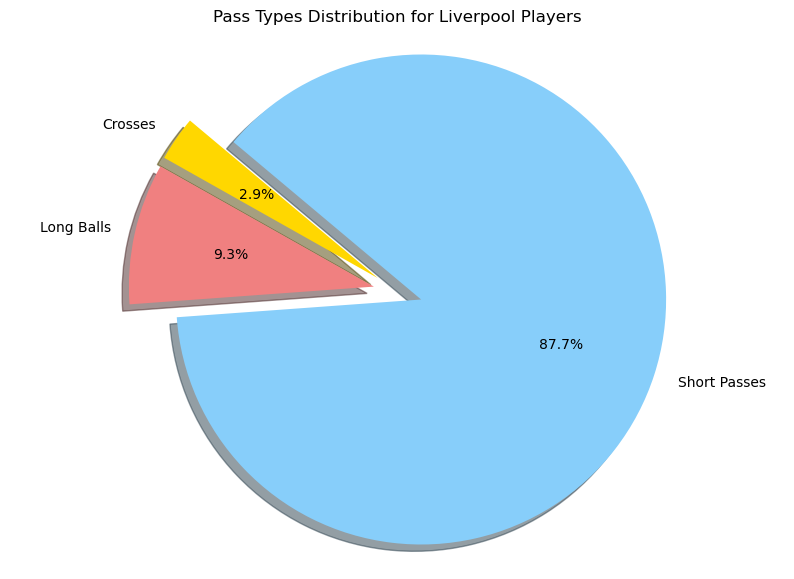

In [164]:
plot_pass_types(pl1819, 'Liverpool')

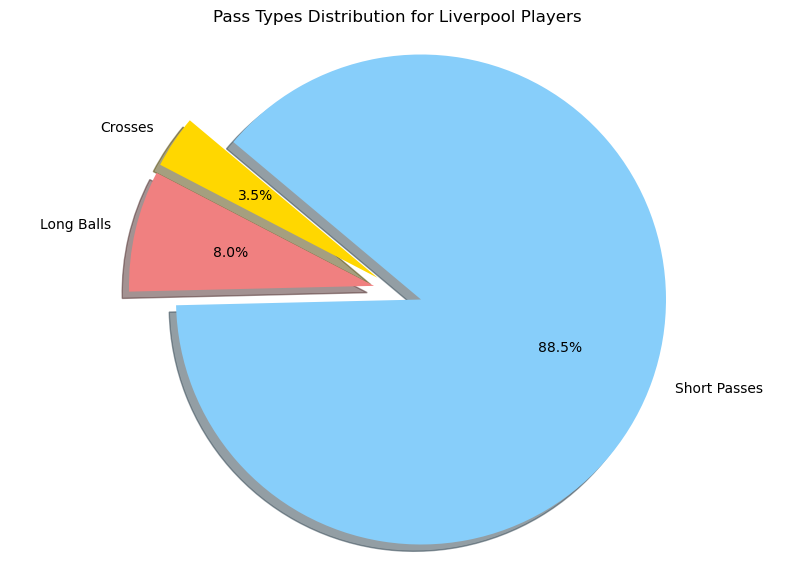

In [165]:
plot_pass_types(pl2324, 'Liverpool')

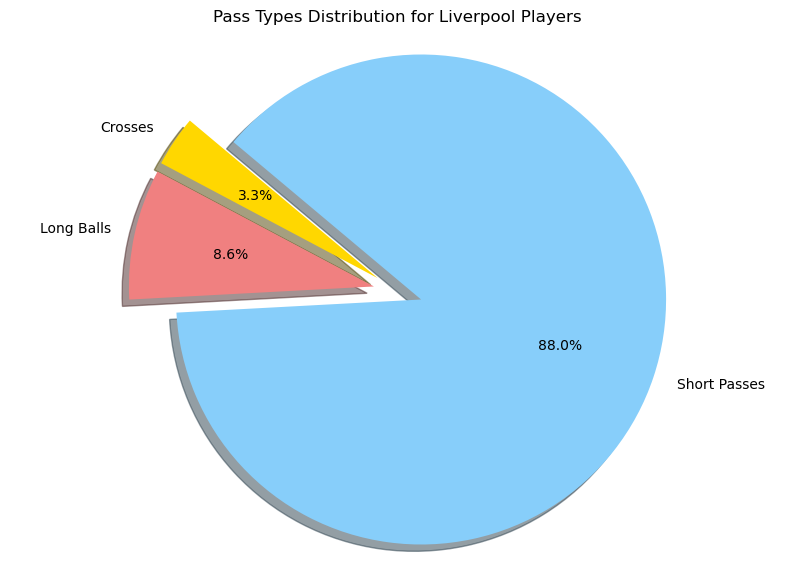

In [166]:
plot_pass_types(pl2425, 'Liverpool')

In [167]:
total_passes_1819 = pass_types(pl1819, 'Liverpool')['total']
total_passes_1819

24647

In [168]:
pass_types(pl1819, 'Liverpool')['total']/38

648.6052631578947

In [169]:
def plot_mean_passes_per_match(season1, season2, season3):
    seasons = [season1, season2, season3]
    means = []
    for season in seasons:
        mean_passes = pass_types(season, 'Liverpool')['total']/38
        means.append(mean_passes)

    means[2] = means[2] * (38/29)

    plt.figure(figsize=(10, 5))
    plt.bar(['1819', '2324', '2425'], means, color=['blue', 'orange', 'green'], 
            alpha=0.7)
    plt.title('Mean Passes per Match for Liverpool Players')
    plt.xlabel('Season')
    plt.ylabel('Mean Passes')
    plt.grid()
    plt.show()

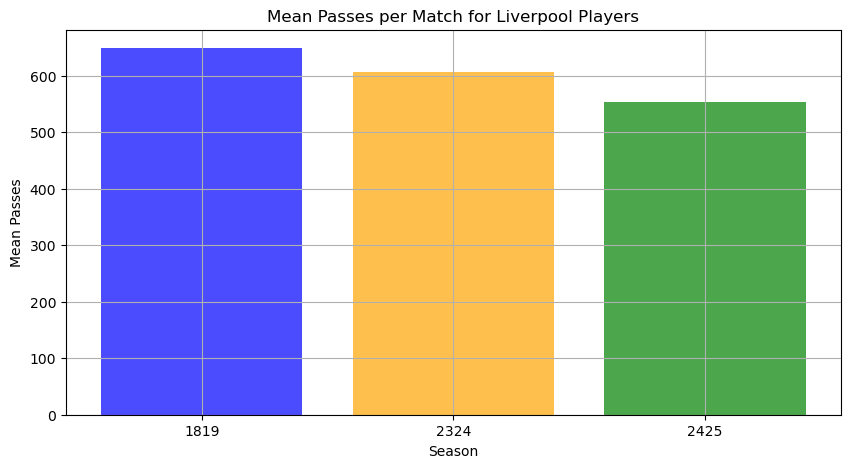

In [170]:
plot_mean_passes_per_match(pl1819, pl2324, pl2425)

In [171]:
team1819 = pd.read_csv('data/teams/PL1819_team.csv')
team2324 = pd.read_csv('data/teams/PL2324_team.csv')
team2425 = pd.read_csv('data/teams/PL2425_team.csv')

In [172]:
team1819['season'] = '1819'
team2324['season'] = '2324'
team2425['season'] = '2425'

all_teams = pd.concat([team1819, team2324, team2425], ignore_index=True)

In [173]:
liv_team = all_teams[all_teams['team_name'] == 'Liverpool']

In [174]:
liv_team.columns

Index(['team_name', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Goals',
       'Shots pg', 'Yellow', 'Red', 'Poss%', 'Pass%', 'A_Won', 'Rating',
       'Shoted pg', 'Tackles pg', 'Intercept pg', 'Fouls pg', 'Offsides pg',
       'Shots OT pg', 'Dribbles pg', 'Fouled pg', 'season'],
      dtype='object')

In [175]:
liv_team_stat = liv_team[['Shots pg', 'Shoted pg', 'Poss%', 'Pass%', 'A_Won', 'Fouls pg', 'Fouled pg', 'season']]

In [176]:
liv_team_stat.set_index('season', inplace=True)

In [177]:
liv_team_stat

,Shots pg,Shoted pg,Poss%,Pass%,A_Won,Fouls pg,Fouled pg
season,,,,,,,
1819,15.1,8.1,58.8,84.4,16.0,8.3,9.1
2324,20.8,10.9,61.3,85.8,15.6,12.2,9.9
2425,17.0,9.7,57.2,86.3,10.8,11.6,9.3


In [178]:
liv_team.columns

Index(['team_name', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Goals',
       'Shots pg', 'Yellow', 'Red', 'Poss%', 'Pass%', 'A_Won', 'Rating',
       'Shoted pg', 'Tackles pg', 'Intercept pg', 'Fouls pg', 'Offsides pg',
       'Shots OT pg', 'Dribbles pg', 'Fouled pg', 'season'],
      dtype='object')

In [179]:
liv_team[['GF', 'GA', 'GD', 'Goals', 'W', 'D', 'L', 'Pts']]

,GF,GA,GD,Goals,W,D,L,Pts
1,89,22,67,89,30,7,1,97
22,86,41,45,86,24,10,4,82
40,69,27,42,69,21,7,1,70


In [180]:
t_df = liv_team[['GF', 'GA', 'Goals','Pts']]
t_df/np.array([38, 38, 29]).reshape(3, 1)

,GF,GA,Goals,Pts
1,2.342105,0.578947,2.342105,2.552632
22,2.263158,1.078947,2.263158,2.157895
40,2.379310,0.931034,2.379310,2.413793


In [ ]:
print('1819 half : {}, full : {}'.format(liv_1819_results['half_liv_score'].sum(), liv_1819_results['full_liv_score'].sum()))
print('2324 half : {}, full : {}'.format(liv_2324_results['half_liv_score'].sum(), liv_2324_results['full_liv_score'].sum()))
print('2425 half : {}, full : {}'.format(liv_2425_results['half_liv_score'].sum(), liv_2425_results['full_liv_score'].sum()))

1819 half : 38, full : 89
2324 half : 32, full : 86
2425 half : 31, full : 69
